Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading in data

In [2]:
df = pd.read_csv("USUnemploymentClaims.csv")

In [3]:
df.head()

,Report Date,Claims,Change
0,12/28/2019,223000,-2000
1,1/4/2020,214000,-9000
2,1/11/2020,205000,-9000
3,1/18/2020,223000,18000
4,1/25/2020,217000,-6000


In [4]:
df

,Report Date,Claims,Change
0,12/28/2019,223000,-2000
1,1/4/2020,214000,-9000
2,1/11/2020,205000,-9000
3,1/18/2020,223000,18000
4,1/25/2020,217000,-6000
5,2/1/2020,203000,-14000
6,2/8/2020,206000,3000
7,2/15/2020,211000,5000
8,2/22/2020,219000,8000
9,2/29/2020,215000,-4000


12/28


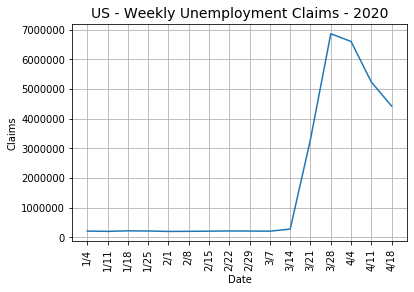

In [24]:
import matplotlib as mpl

#df['Report Date'] = df['Report Date'].str.slice(0, -5)
print(df['Report Date'][0])



plt.plot(df['Report Date'][1:],df['Claims'][1:])
plt.title("US - Weekly Unemployment Claims - 2020",fontsize=14)
plt.xlabel("Date")

plt.xticks(rotation=90)

plt.ylabel("Claims")
#plt.yticks(np.arange(0,10000000,1000000))
#plt.yticks([0, 1],["1,000,000","2,000,000","3,000,000","4,000,000","5,000,000","6,000,000","7,000,000"])
plt.grid()

In [ ]:
plt.plot(df['Report Date'],df['Change'],'*-b')
plt.title("US - Weekly Unemployment Claims Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Claims")

In [ ]:
percentage = [0]
for i in range(1,len(df),1):
#for i in range(1,5,1):
    j = i-1
    delta = (df['Claims'][i]-df['Claims'][j])/(df['Claims'][j])
    delta = round(delta * 100,2)
    #print(round(delta,2))
    percentage.append(delta)
    
df['Percentage'] = percentage

df

In [ ]:
plt.plot(df['Report Date'],df['Percentage'],'*-b')
plt.title("US - Weekly Unemployment Claims Percentage Changes",fontsize=14)
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Percentage(%)")

In [ ]:
totalClaimsCovid19 = df['Claims'][11:17].sum()
print("Total unemployment Claims since COVID-19 Outbreak and Shelter in Place in mid-March: {:,}".format(totalClaimsCovid19))